This assigment was done by Polina Turishcheva

# Part One

In [2]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

In [6]:
# data generation
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)
x_test = np.linspace(0, 10, 100)
y_test_clear = np.sin(x_test)
y_test_dirty = y_test_clear+0.1 * rng.randn(100)

According to Taylor series $sin(x)= x- \frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!} ...$  
Also we should note that maximum amplitude of noise if 10% of maximum signal amplitude, hence, there is no sence in using big degrees for approzimation, so I would test only degrees from 3 (as one does not make much sence, it just a line) up to 9.

In [4]:
degrees=list(range(3, 10, 2))

for deg in degrees:
    polyreg=PolynomialFeatures(deg)
    cur_x = polyreg.fit_transform(x.reshape(-1,1))
    lin = LinearRegression()
    cv_score = cross_val_score(lin, cur_x, y.reshape(-1,1), cv=10, scoring= make_scorer(mean_squared_error))
    print(f'Degree {deg} \n MSE {sum(cv_score)/len(cv_score)} \n STD {np.std(cv_score)}')

Degree 3 
 MSE 0.34735641978542964 
 STD 0.08648532903116804
Degree 5 
 MSE 0.042724248162502705 
 STD 0.01765067770007433
Degree 7 
 MSE 0.010422291104195531 
 STD 0.005280319823850633
Degree 9 
 MSE 0.010635634276361192 
 STD 0.006276211046407407


Accuracy : 0.9766246927667185


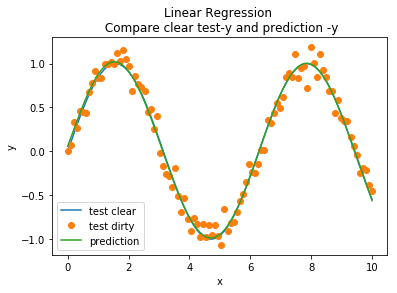

In [9]:
# Degree 7 seems to be the best as after it MSE and STD start to grows again
polyreg=PolynomialFeatures(deg)
cur_x = polyreg.fit_transform(x.reshape(-1,1))
lin = LinearRegression().fit(cur_x, y)
x_test_cur = polyreg.transform(x_test.reshape(-1,1))
pred = lin.predict(x_test_cur)

print(f"Accuracy : {lin.score(x_test_cur, y_test_clear)}")

plt.plot(x_test, y_test_clear, label='test clear')
plt.plot(x_test, y_test_dirty, 'o', label='test dirty')
plt.plot(x_test, pred, label='prediction')
plt.title("Linear Regression \n Compare clear test-y and prediction -y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Accuracy : 0.6697676938835393


/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.805657956826573, tolerance: 0.004248014559176562
  positive)


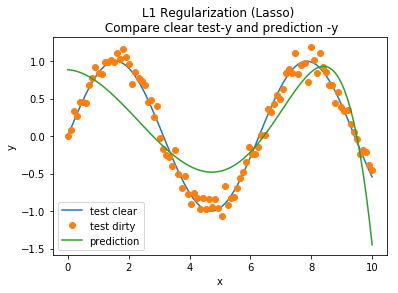

In [10]:
# test L1 regularization - Lasso
polyreg=PolynomialFeatures(deg)
cur_x = polyreg.fit_transform(x.reshape(-1,1))
lin = Lasso(alpha=0.001).fit(cur_x, y)
x_test_cur = polyreg.transform(x_test.reshape(-1,1))
pred = lin.predict(x_test_cur)

print(f"Accuracy : {lin.score(x_test_cur, y_test_clear)}")

plt.plot(x_test, y_test_clear, label='test clear')
plt.plot(x_test, y_test_dirty, 'o', label='test dirty')
plt.plot(x_test, pred, label='prediction')
plt.title("L1 Regularization (Lasso) \n Compare clear test-y and prediction -y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Accuracy : 0.9768112929680574


/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.36734e-20): result may not be accurate.
  overwrite_a=True).T


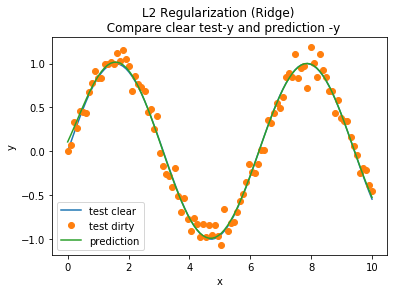

In [11]:
# test L2 relularization - Ridge
polyreg=PolynomialFeatures(deg)
cur_x = polyreg.fit_transform(x.reshape(-1,1))
lin = Ridge(0.1).fit(cur_x, y)
x_test_cur = polyreg.transform(x_test.reshape(-1,1))
pred = lin.predict(x_test_cur)

print(f"Accuracy : {lin.score(x_test_cur, y_test_clear)}")

plt.plot(x_test, y_test_clear, label='test clear')
plt.plot(x_test, y_test_dirty, 'o', label='test dirty')
plt.plot(x_test, pred, label='prediction')
plt.title("L2 Regularization (Ridge) \n  Compare clear test-y and prediction -y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

* L1 regularization nake the prediction even worse
* L2 regularization impoves the accuracy in the 4th digit after the dot, hence, I can say that there is no big difference after applying L2 regularization

# Part Two

In [120]:
import pandas as pd
from seaborn import heatmap
from itertools import chain
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [86]:
data = pd.read_csv('banking.csv')
x = data.drop(columns=['y'])
y = data['y']

## Discover the dataset

In [26]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [27]:
# there are "unknown values", which may be considered as None in default, loan, marital, housing
# "nonexistent" in poutcome also may be considered as None
# nans in cons_price_idx, emp_var_rate, nr_employed, pdays 
# 'previous' column seems to be a categorical column 
# as it has 8 unique interger values (from 0 to 7) for 41188 rows
all_columns = set(x.columns)
for i in all_columns:
    print(i, len(x[i].unique()), x[i].unique())

pdays 28 [999.   6.   3.  nan   2.   4.  16.   0.   5.  11.  14.  13.   9.  15.
  17.  12.  26.   7.  19.  10.   1.  18.   8.  20.  21.  22.  25.  27.]
emp_var_rate 11 [ 1.4 -0.1 -1.7 -1.8 -2.9  1.1  nan -3.4 -1.1 -3.  -0.2]
day_of_week 5 ['thu' 'fri' 'tue' 'mon' 'wed']
cons_conf_idx 26 [-36.1 -42.  -39.8 -47.1 -31.4 -42.7 -46.2 -40.8 -36.4 -41.8 -40.4 -26.9
 -30.1 -50.  -33.6 -34.6 -40.  -38.3 -37.5 -49.5 -33.  -50.8 -34.8 -40.3
 -29.8 -45.9]
nr_employed 12 [5228.1 5195.8 4991.6 5099.1 5076.2 5191.     nan 5017.5 5008.7 4963.6
 5023.5 5176.3]
campaign 42 [ 1  3  2  8  5  4 25 11 12 18  6 17  7 20 16 14 10  9 19 29 13 40 15 34
 22 24 41 21 23 39 28 27 31 35 26 30 32 43 33 42 56 37]
housing 3 ['yes' 'no' 'unknown']
education 8 ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
loan 3 ['no' 'yes' 'unknown']
cons_price_idx 27 [93.444 93.2   94.055 93.075 92.201 93.918 92.893 92.963 93.994 94.465
 93.798 92.431 92.649 92.843 9

## Data Preprocessing

In [97]:
all_cols = set(x.columns)
continious_cols = set(x.describe().columns)
categorical_cols = list(all_cols.difference(continious_cols))

# categorical encoding
ohe = OneHotEncoder()
array_hot_encoded = ohe.fit_transform(x[categorical_cols]).toarray()
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=x.index, 
                                columns = list(chain(*ohe.categories_)))
data_hot_encoded = data_hot_encoded.drop(columns=['unknown', 'nonexistent'])

# fill in Nones
continious_cols = list(continious_cols)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array_imputed = imp.fit_transform(x[continious_cols])

# feature scaling
stsc = StandardScaler()
array_scaled = stsc.fit_transform(array_imputed)
data_scaled = pd.DataFrame(array_scaled, index=x.index, columns=continious_cols)

data_out = pd.concat([data_hot_encoded, data_scaled], axis=1)

In [98]:
# in our case data is imbalanced but this is not so crucial
# we do not need any special tricks like over-sampling or under-sampling
# but we should keep a watchful eye that our train and test datasets have the same distribution
print(f'Check if the data is balanced : {sum(y)/len(y)}')
x_train, x_test, y_train, y_test = train_test_split(data_out, y, test_size=0.2)
print(f'Check if distributions are the same : {sum(y_train)/len(y_train)*0.9 <= sum(y_test)/len(y_test)<=sum(y_train)/len(y_train)*1.1}')
print(f'Train set y-percentage : {sum(y_train)/len(y_train)}')
print(f'Test set y-percentage : {sum(y_test)/len(y_test)}')

Check if the data is balanced : 0.11265417111780131
Check if distributions are the same : True
Train set y-percentage : 0.11262518968133535
Test set y-percentage : 0.11277008982762807


## Model Creation

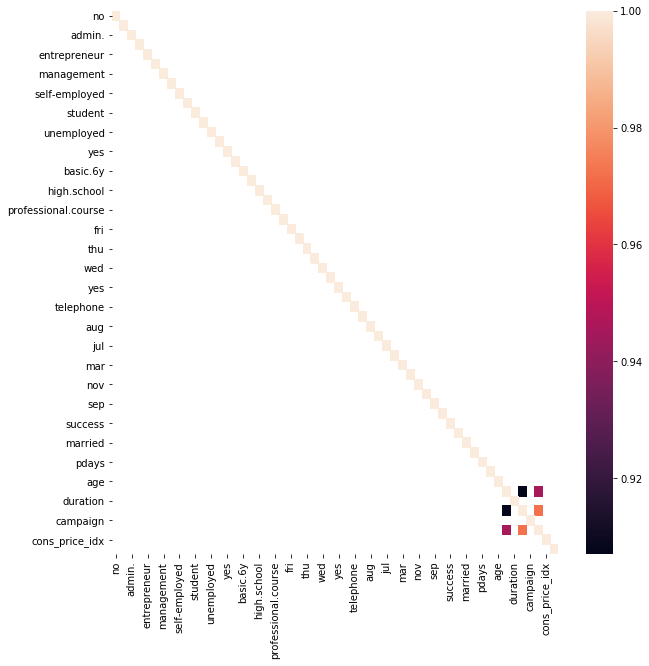

In [109]:
# check if there are some highly correlated features that should be deleted
# here there are a couple of higly pairwise highly correlated feaures
# but its not crucial, so we will delete them only if we will get bad persomance further

plt.figure(figsize=(10,10))
# sns.heatmap(data_out.corr())
heatmap(data_out.corr()[data_out.corr()>0.9])

In [119]:
grid={"C":np.logspace(-4,4,20), "penalty":["l1","l2"], "solver":["liblinear", "lbfgs"]}
grid_search = GridSearchCV(LogisticRegression(), grid, cv=5)

# сopypasted from Lab4
grid_search.fit(x_train, y_train)
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selecti

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_para

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_para

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

0.887 (+/-0.000) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.900 (+/-0.004) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.888 (+/-0.001) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887 (+/-0.000) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'lbfgs'}
0.903 (+/-0.004) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
0.900 (+/-0.004) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'lbfgs'}
0.895 (+/-0.002) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'lbfgs'}
0.906 (+/-0.005) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
0.906 (+/-0.004) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'lbfgs'}
0.906 (+/-0.

/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Check on the test set

In [123]:
# best parameters are C=0.08858667904100823, penalty="l2", solver='lbfgs'
best_logreg = LogisticRegression(**grid_search.best_params_).fit(x_train, y_train)
pred = best_logreg.predict(x_test)

print(f"Recall {recall_score(y_test, pred)}")
print(f" Precision {precision_score(y_test, pred)}")
print(f"Accuracy {accuracy_score(y_test, pred)}")

Recall 0.3961248654467169
 Precision 0.6456140350877193
Accuracy 0.9073804321437242


/Users/polinaturiseva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
